# **dataset 업로드**

In [2]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import KFold, StratifiedKFold
import torchvision.models as models

In [ ]:
from google.colab import files
file_uploaded = files.upload()
!unzip "train.zip" -d "/content"

Saving train.zip to train.zip
Archive:  train.zip
 extracting: /content/train/flip-over/flip-over1.png  
 extracting: /content/train/flip-over/flip-over2.png  
 extracting: /content/train/flip-over/flip-over3.png  
  inflating: /content/train/flip-over/flip-over4.png  
 extracting: /content/train/prostrate/prostrate1.png  
 extracting: /content/train/prostrate/prostrate2.png  
 extracting: /content/train/prostrate/prostrate3.png  
 extracting: /content/train/prostrate/prostrate4.png  
train/run/사본 -img32.png:  mismatching "local" filename (train/run/ьВмы│╕ -img32.png),
         continuing with "central" filename version
 extracting: /content/train/run/사본 -img32.png  
train/run/사본 -img34.png:  mismatching "local" filename (train/run/ьВмы│╕ -img34.png),
         continuing with "central" filename version
 extracting: /content/train/run/사본 -img34.png  
train/run/사본 -img36.png:  mismatching "local" filename (train/run/ьВмы│╕ -img36.png),
         continuing with "central" filename version


In [ ]:
file_uploaded = files.upload()
!unzip "test.zip" -d "/content"

Saving test.zip to test.zip
Archive:  test.zip
 extracting: /content/test/flip-over/flip-over2.png  
 extracting: /content/test/flip-over/flip-over3.png  
 extracting: /content/test/prostrate/prostrate1.png  
 extracting: /content/test/prostrate/prostrate3.png  
test/run/사본 -img32.png:  mismatching "local" filename (test/run/ьВмы│╕ -img32.png),
         continuing with "central" filename version
 extracting: /content/test/run/사본 -img32.png  
test/run/사본 -img36.png:  mismatching "local" filename (test/run/ьВмы│╕ -img36.png),
         continuing with "central" filename version
 extracting: /content/test/run/사본 -img36.png  
test/run/사본 -img43.png:  mismatching "local" filename (test/run/ьВмы│╕ -img43.png),
         continuing with "central" filename version
 extracting: /content/test/run/사본 -img43.png  
test/run/사본 -img59.png:  mismatching "local" filename (test/run/ьВмы│╕ -img59.png),
         continuing with "central" filename version
 extracting: /content/test/run/사본 -img59.png  
test/

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# **train dataset**

In [8]:
!pip install albumentations

     |████████████████████████████████| 631 kB 8.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654020 sha256=d8840337a991f3851e9f92db0c8a59bae716e2e6564c2af93990a16e4e443118
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

# transform = transforms.Compose([transforms.Resize((35,35)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
transform = A.Compose([
            A.Resize(50,50, p=1.0),
            # A.CenterCrop(224,224),
            A.HorizontalFlip(p=0.5),
            A.Normalize(mean=mean, std=std, max_pixel_value=255.0, p=1.0),
            ToTensorV2(p=1.0),
        ], p=1.0)

batch_size = 4

trainset = torchvision.datasets.ImageFolder(root = "/content/train",
                                           transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.ImageFolder(root='/content/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = trainset.classes
num=len(classes)
classes

['flip-over', 'prostrate', 'run', 'sit', 'stand', 'standup', 'stretch']

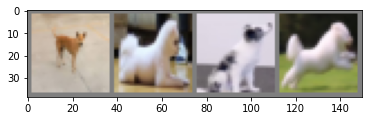

stand prostrate   sit   run


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [5]:
net = models.resnet152(pretrained=True).to(device)

num_features = net.fc.in_features
net.fc = nn.Linear(num_features, num).to(device)

NameError: ignored

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [ ]:
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % num == num-1:
        # if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,     7] loss: 0.006
[2,     7] loss: 0.006
[3,     7] loss: 0.006
[4,     7] loss: 0.006
[5,     7] loss: 0.006
[6,     7] loss: 0.006
[7,     7] loss: 0.006
[8,     7] loss: 0.006
[9,     7] loss: 0.006
[10,     7] loss: 0.006
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

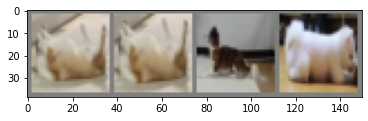

GroundTruth:  flip-over flip-over prostrate prostrate


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Test

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
print(classes)
outputs

['flip-over', 'prostrate', 'run', 'sit', 'stand', 'standup', 'stretch']


tensor([[-0.4135, -0.2549,  0.4894,  0.4731,  0.5426,  0.8408, -1.7103],
        [-0.4063, -0.2664,  0.4309,  0.4867,  0.5433,  0.8474, -1.6698],
        [-0.1547, -0.1545,  0.0153,  0.3106,  0.2794,  0.3034, -0.5770],
        [-0.4671, -0.1245,  0.9056,  0.3658,  0.5701,  0.7576, -2.0480]],
       grad_fn=<AddmmBackward>)

In [ ]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  standup standup   sit   run


In [ ]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy : %d %%' % (100 * correct / total))

Accuracy : 15 %


In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class flip-over is: 0.0 %
Accuracy for class prostrate is: 0.0 %
Accuracy for class run   is: 0.0 %
Accuracy for class sit   is: 0.0 %
Accuracy for class stand is: 0.0 %
Accuracy for class standup is: 100.0 %
Accuracy for class stretch is: 0.0 %
